In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
os.chdir("/tf/notebooks")
!pip3 install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 11.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 10.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [2]:
import tensorflow as tf
from keras import optimizers, callbacks

from models import SiameseNetwork
from utils import load_data, visualise

In [3]:
print("Tensorflow version:", tf.__version__)
gpus = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(gpus))

Tensorflow version: 2.12.0
Num GPUs Available:  1


Found 6194 files belonging to 1 classes.
Found 6194 files belonging to 1 classes.
Found 6194 files belonging to 1 classes.


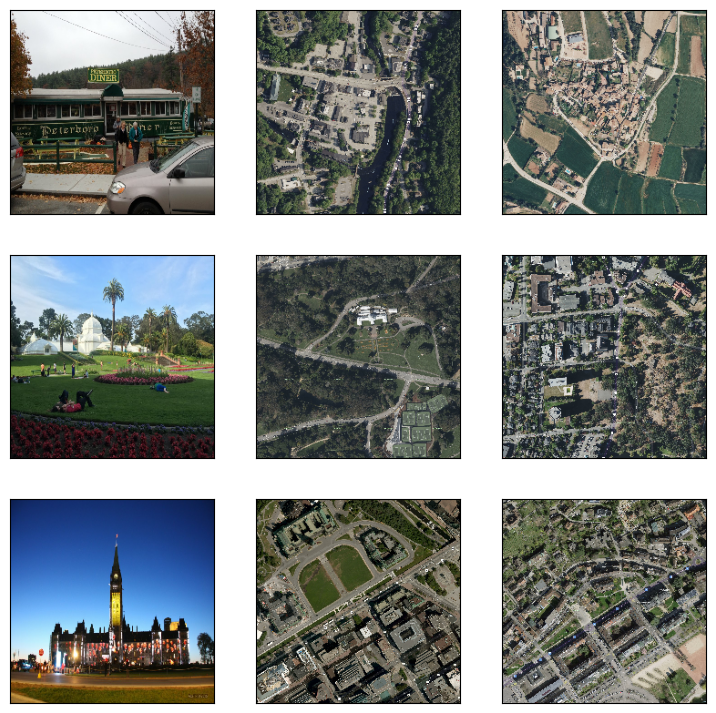

In [4]:
train_data = load_data()

visualise(*list(train_data.take(1).as_numpy_iterator())[0])


In [9]:
model = SiameseNetwork()
model.compile(optimizer=optimizers.Adam(0.05),
              weighted_metrics=[])

Found 6194 files belonging to 1 classes.
Found 6194 files belonging to 1 classes.
Found 6194 files belonging to 1 classes.


In [10]:
# Checkpoint during training
checkpoint_path = "siamese_chkpts/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                        save_weights_only=False,
                                        save_freq=100,
                                        verbose=1)

model.fit(train_data,
          epochs=1,
          callbacks=[cp_callback])

  1/194 [..............................] - ETA: 32:37 - loss: 0.4999

KeyboardInterrupt: 

In [6]:
model.save("/tf/notebooks/siamese_model")

INFO:tensorflow:Assets written to: /tf/notebooks/testSave/assets


INFO:tensorflow:Assets written to: /tf/notebooks/testSave/assets
